                                            sequence  class
0  ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1  ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3  ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4  ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3

Random Forest Results:
Accuracy: 0.7511415525114156
Precision: 0.7701430882180287
Recall: 0.7511415525114156
F1 Score: 0.7486308398607723
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       102
           1       0.85      0.67      0.75       106
           2       0.96      0.65      0.78        78
           3       0.77      0.64      0.70       125
           4       0.64      0.69      0.66       149
           5       0.91      0.61      0.73        51
           6       0.71      0.94      0.81       265

    accuracy                           0.75       876
   macro avg 

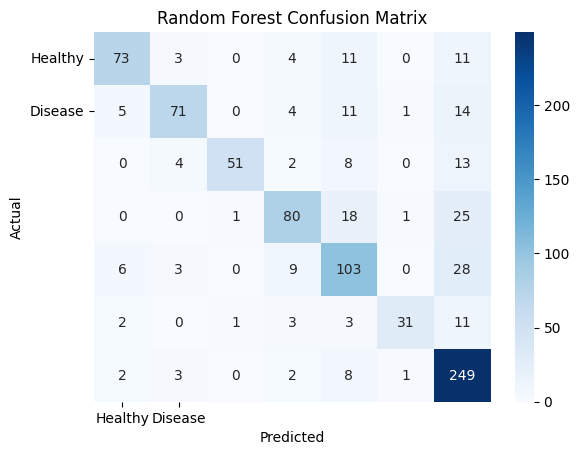

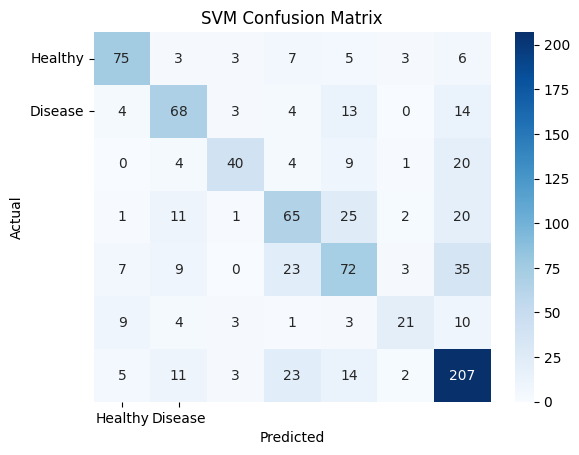

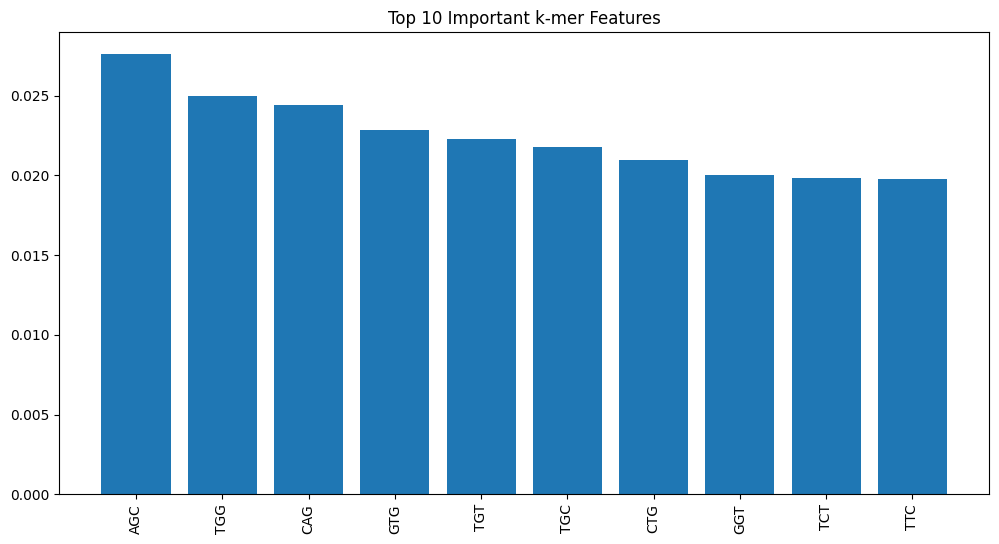

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

file_path = r"C:\Users\athar\OneDrive\Desktop\Practical\Bioinformatics\human.txt"
df = pd.read_csv(file_path, sep='\t')
print(df.head())

sequences = df['sequence']
labels = df['class']

def get_kmers(seq, k=3):
    return [seq[i:i+k] for i in range(len(seq)-k+1)]

vectorizer = CountVectorizer(analyzer=get_kmers)
X = vectorizer.fit_transform(sequences)
y = labels

X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
svm = SVC(kernel="linear").fit(X_train, y_train)

rf_pred, svm_pred = rf.predict(X_test), svm.predict(X_test)

def evaluate(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print(classification_report(y_true, y_pred))

evaluate("Random Forest", y_test, rf_pred)
evaluate("SVM", y_test, svm_pred)

def plot_cm(y_true, y_pred, title):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues",
                xticklabels=["Healthy","Disease"], yticklabels=["Healthy","Disease"])
    plt.title(title); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

plot_cm(y_test, rf_pred, "Random Forest Confusion Matrix")
plot_cm(y_test, svm_pred, "SVM Confusion Matrix")

imp = rf.feature_importances_
idx = np.argsort(imp)[-10:][::-1]
plt.figure(figsize=(12,6))
plt.bar(range(10), imp[idx], tick_label=[X_df.columns[i] for i in idx])
plt.title("Top 10 Important k-mer Features"); plt.xticks(rotation=90); plt.show()


In [10]:
'''from Bio import SeqIO
from Bio.PDB import PDBParser
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# ------------------------------------------------
# Step 1: Read and Display FASTA File Information
# ------------------------------------------------

fasta_file = r"C:\Users\athar\Downloads\sequence.fasta"   # <-- Replace with your FASTA file path

if os.path.exists(fasta_file):
    record = SeqIO.read(fasta_file, "fasta")

    print("=== FASTA FILE INFORMATION ===")
    print("Protein ID:", record.id)
    print("Description:", record.description)
    print("Sequence:\n", record.seq)
    print("Length of Sequence:", len(record.seq))
    print("\n--------------------------------------\n")
else:
    print(f"[Warning] FASTA file '{fasta_file}' not found. Skipping sequence display.\n")

# ------------------------------------------------
# Step 2: Read and Visualize PDB / ENT Structure
# ------------------------------------------------

# Accept either .pdb or .ent file
pdb_file = r"C:\Users\athar\Downloads\pdb3rgk.ent"  # <-- Replace with your structure file (either .pdb or .ent)

if not os.path.exists(pdb_file):
    print(f"[Error] Structure file '{pdb_file}' not found.")
else:
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("protein_structure", pdb_file)

    # Extract coordinates of Carbon-alpha (Cα) atoms
    coords = [atom.coord for atom in structure.get_atoms() if atom.element == 'C']

    if len(coords) == 0:
        print("[Warning] No atom coordinates found in file. Please check your PDB/ENT file.")
    else:
        x, y, z = zip(*coords)

        # Plot 3D structure
        fig = plt.figure(figsize=(7, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(x, y, z, marker='o', color='blue', markersize=4, linewidth=1)

        ax.set_title("3D Structure Visualization (from .ent/.pdb)")
        ax.set_xlabel("X-axis")
        ax.set_ylabel("Y-axis")
        ax.set_zlabel("Z-axis")
        plt.show()

        print("3D structure visualization completed successfully!") 
        '''


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 305-306: truncated \UXXXXXXXX escape (3979605533.py, line 58)

=== FASTA FILE INFORMATION ===
Protein ID: CAA25109.1
Description: CAA25109.1 myoglobin [Homo sapiens]
Sequence:
 MGLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNYKELGFQG
Length of Sequence: 154

--------------------------------------



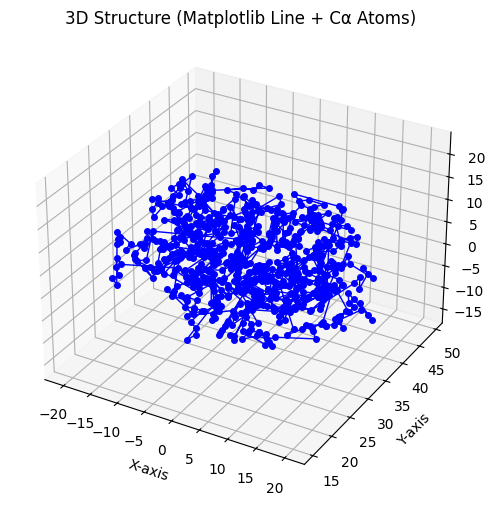

Matplotlib 3D structure visualization completed.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

py3Dmol cartoon visualization displayed.


In [11]:

from Bio import SeqIO
from Bio.PDB import PDBParser
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np

try:
    import py3Dmol
    PY3DMOL_AVAILABLE = True
except ImportError:
    PY3DMOL_AVAILABLE = False
    print("[Warning] py3Dmol not installed. Cartoon visualization will be skipped.")

fasta_file = r"C:\Users\athar\Downloads\sequence.fasta"  

if os.path.exists(fasta_file):
    record = SeqIO.read(fasta_file, "fasta")

    print("=== FASTA FILE INFORMATION ===")
    print("Protein ID:", record.id)
    print("Description:", record.description)
    print("Sequence:\n", record.seq)
    print("Length of Sequence:", len(record.seq))
    print("\n--------------------------------------\n")
else:
    print(f"[Warning] FASTA file '{fasta_file}' not found. Skipping sequence display.\n")


pdb_file = r"C:\Users\athar\Downloads\pdb3rgk.ent"  

if not os.path.exists(pdb_file):
    print(f"[Error] Structure file '{pdb_file}' not found.")
else:
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("protein_structure", pdb_file)

    coords = [atom.coord for atom in structure.get_atoms() if atom.element == 'C']

    if len(coords) == 0:
        print("[Warning] No Cα atom coordinates found in file.")
    else:
        x, y, z = zip(*coords)

        fig = plt.figure(figsize=(7, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(x, y, z, marker='o', color='blue', markersize=4, linewidth=1)
        ax.set_title("3D Structure (Matplotlib Line + Cα Atoms)")
        ax.set_xlabel("X-axis")
        ax.set_ylabel("Y-axis")
        ax.set_zlabel("Z-axis")
        plt.show()
        print("Matplotlib 3D structure visualization completed.")

        if PY3DMOL_AVAILABLE:
            with open(pdb_file) as f:
                pdb_data = f.read()

            view = py3Dmol.view(width=700, height=500)
            view.addModel(pdb_data, "pdb")
            view.setStyle({'cartoon': {'color':'spectrum'}}) 
            view.zoomTo()
            view.show()
            print("py3Dmol cartoon visualization displayed.")
        else:
            print("[Info] Install py3Dmol for cartoon-style 3D visualization.")
